# Importing Needed Packages


In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline


# Reading CSV file as weather_df and making date_time column as index of dataframe


In [2]:
weather_df = pd.read_csv('Temperature Forecast.csv', parse_dates=['date_time'], index_col='date_time')
weather_df.head(5)


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,11,21,17,50,0.0,1015,11,10,320,10
2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,22,11,52,0.0,1015,11,10,315,11
2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,6,55,0.0,1015,11,10,310,11
2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,0,57,0.0,1015,10,10,304,12
2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,14,19,0,54,0.0,1016,11,10,302,11


# Checking columns in our dataframe


In [3]:
weather_df.columns


Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

# Now shape


In [4]:
weather_df.shape


(8410, 24)

In [5]:
weather_df.describe()


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,8410.000000,8410.000000,8410.0,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000
mean,33.970511,21.746254,0.0,11.155363,6.772176,4.483234,46.370511,14.056599,31.359929,31.513199,29.187872,13.607848,16.807967,48.986683,0.035933,1005.431748,27.310702,9.592271,210.600595,8.991795
std,6.848936,6.894310,0.0,2.204206,1.435972,3.426897,31.167395,9.129550,9.407880,9.271304,7.800637,6.496161,23.966726,27.389225,0.280080,7.355532,8.152716,1.526353,103.306179,4.367831
min,21.000000,6.000000,0.0,4.300000,4.000000,1.000000,0.000000,-14.000000,10.000000,11.000000,10.000000,0.000000,0.000000,2.000000,0.000000,990.000000,6.000000,0.000000,0.000000,0.000000
25%,29.000000,16.000000,0.0,8.700000,6.000000,1.000000,19.000000,7.000000,24.000000,25.000000,24.000000,9.000000,0.000000,25.000000,0.000000,999.000000,21.000000,10.000000,103.000000,6.000000
50%,33.000000,23.000000,0.0,11.600000,7.000000,5.000000,45.000000,13.000000,31.000000,31.000000,29.000000,13.000000,5.000000,48.000000,0.000000,1005.000000,27.000000,10.000000,253.000000,8.000000
75%,40.000000,27.000000,0.0,13.100000,8.000000,7.000000,73.000000,24.000000,38.000000,38.000000,34.000000,18.000000,25.000000,73.000000,0.000000,1012.000000,33.000000,10.000000,297.000000,12.000000
max,48.000000,35.000000,0.0,13.900000,10.000000,11.000000,100.000000,31.000000,58.000000,58.000000,50.000000,41.000000,100.000000,99.000000,7.000000,1023.000000,48.000000,10.000000,360.000000,30.000000


# Checking is there any null values in dataset


In [6]:
weather_df.isnull().any()


maxtempC             False
mintempC             False
totalSnow_cm         False
sunHour              False
uvIndex              False
uvIndex.1            False
moon_illumination    False
moonrise             False
moonset              False
sunrise              False
sunset               False
DewPointC            False
FeelsLikeC           False
HeatIndexC           False
WindChillC           False
WindGustKmph         False
cloudcover           False
humidity             False
precipMM             False
pressure             False
tempC                False
visibility           False
winddirDegree        False
windspeedKmph        False
dtype: bool

### Now lets separate the feature (i.e. temperature) to be predicted from the rest of the featured. weather_x stores the rest of the dataset while weather_y has temperature column.


In [7]:
weather_df_num=weather_df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]
weather_df_num.head()


,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2009-01-01 00:00:00,24,10,17,50,11,8.7,12,0.0,1015,10
2009-01-01 01:00:00,24,10,11,52,11,8.7,13,0.0,1015,11
2009-01-01 02:00:00,24,10,6,55,11,8.7,13,0.0,1015,11
2009-01-01 03:00:00,24,10,0,57,10,8.7,13,0.0,1015,12
2009-01-01 04:00:00,24,10,0,54,11,8.7,14,0.0,1016,11


# Shape of new dataframe


In [9]:
weather_df_num.shape


(8410, 10)

# Columns in new dataframe


In [10]:
weather_df_num.columns


Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'sunHour',
       'HeatIndexC', 'precipMM', 'pressure', 'windspeedKmph'],
      dtype='object')

### Ploting all the column values


array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

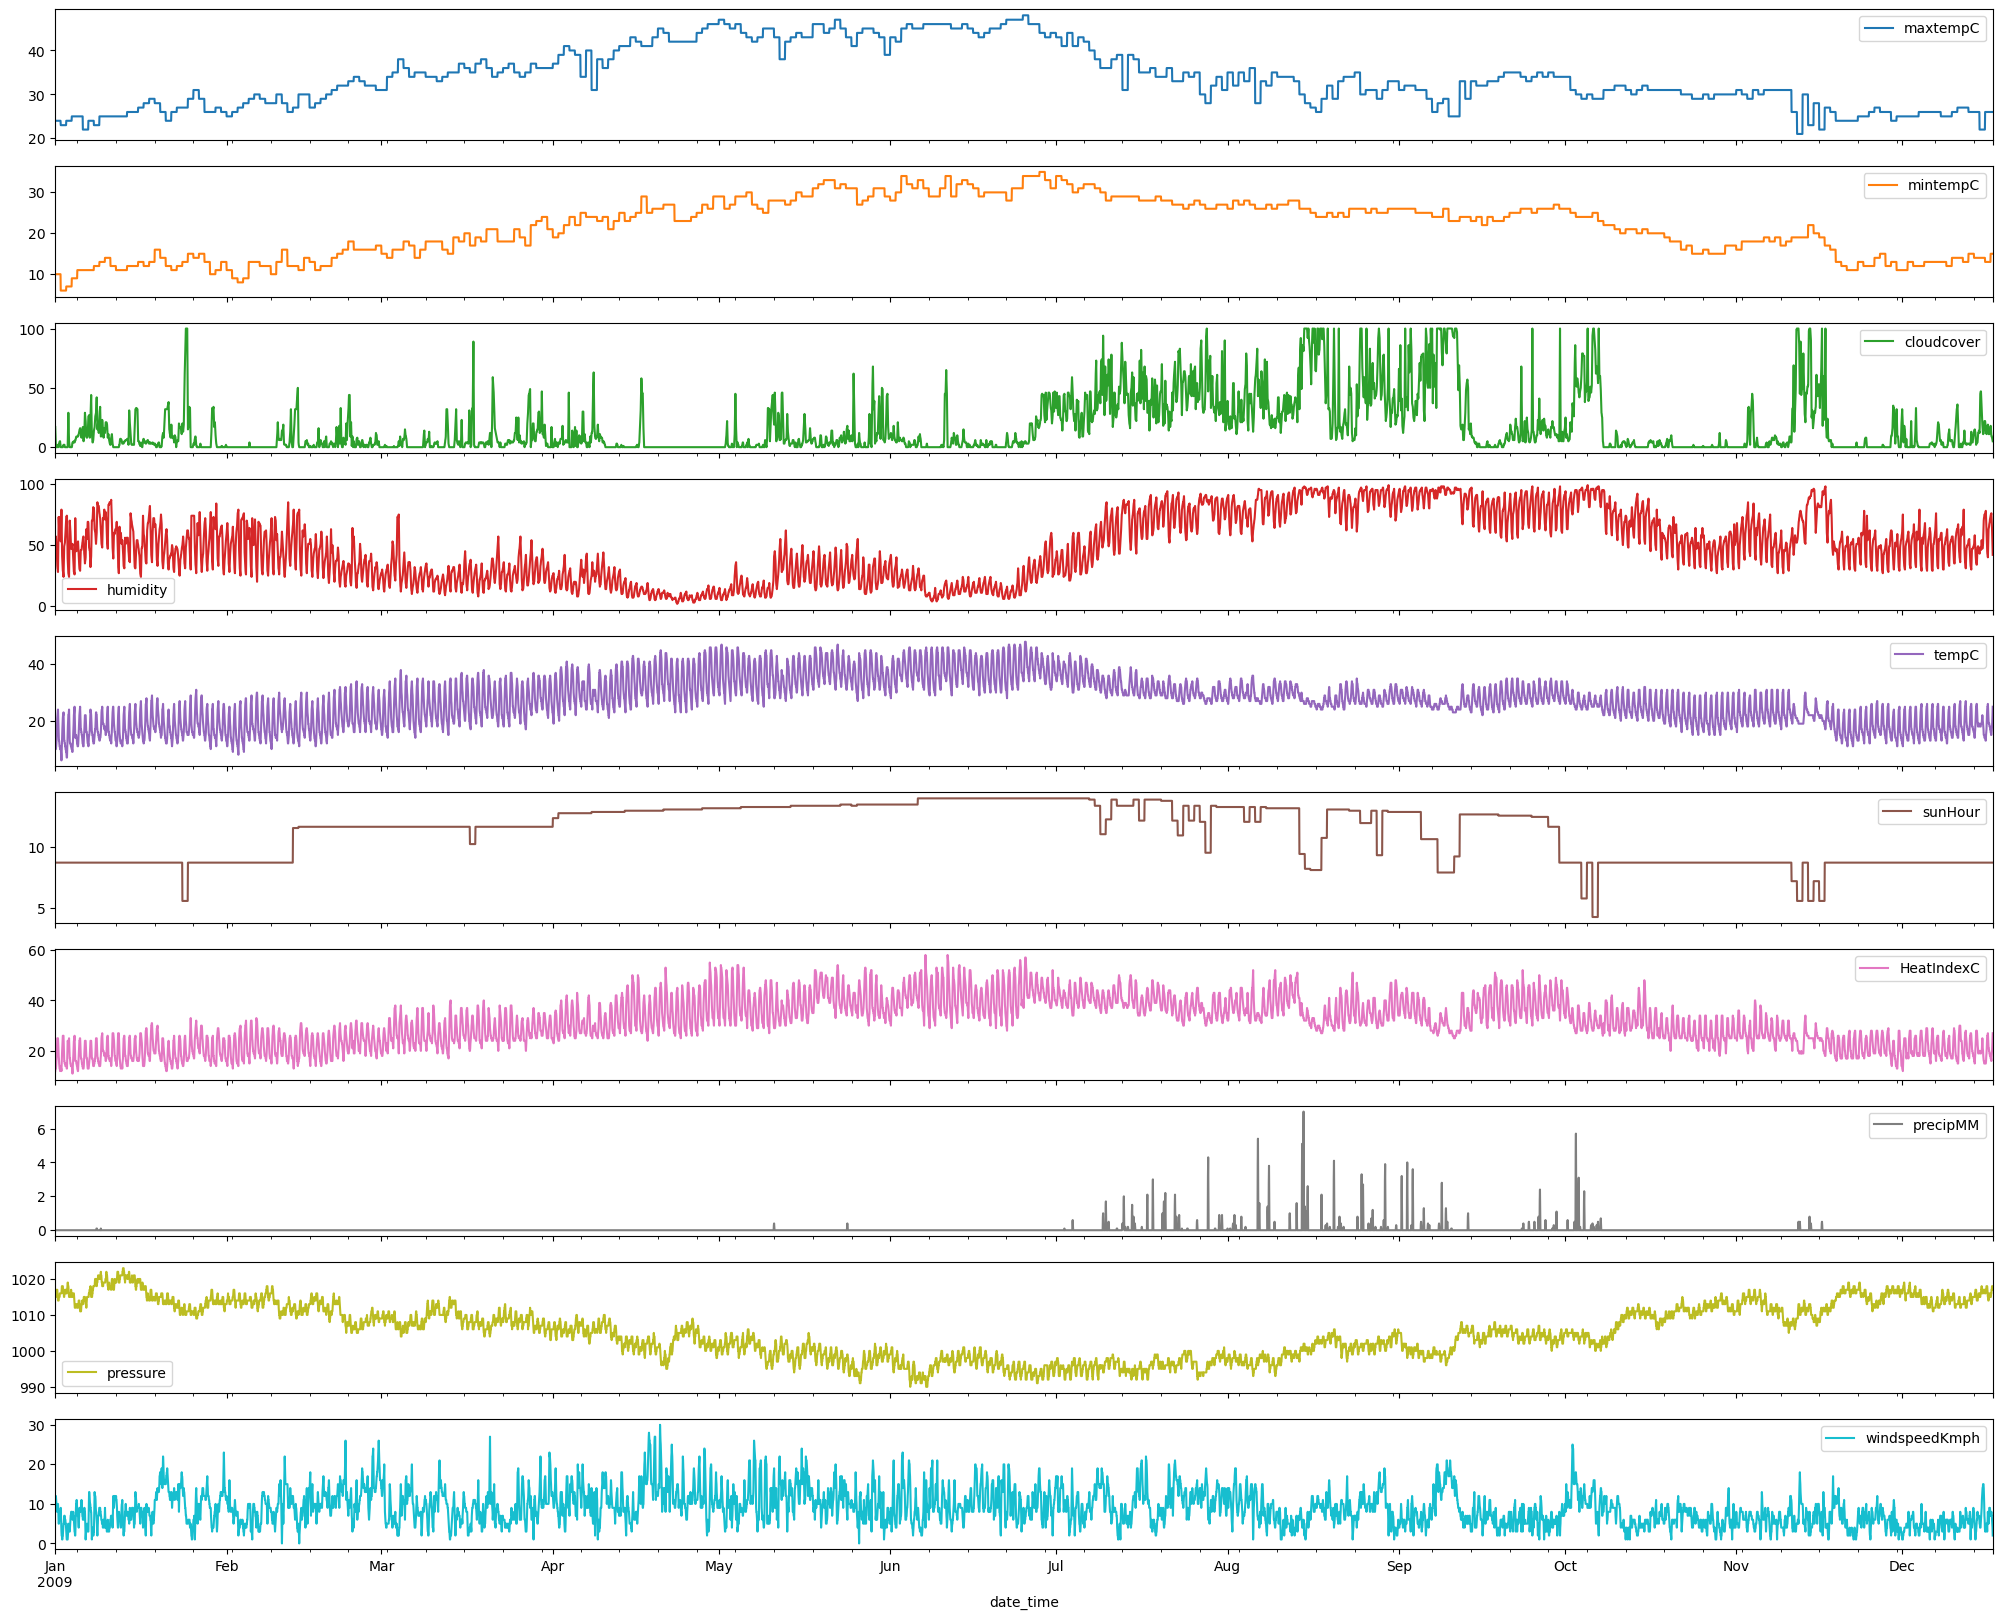

In [11]:
weather_df_num.plot(subplots=True, figsize=(25,20))


### Ploting all the column values for 1 year


array([[<Axes: title={'center': 'maxtempC'}>,
        <Axes: title={'center': 'mintempC'}>,
        <Axes: title={'center': 'cloudcover'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'tempC'}>,
        <Axes: title={'center': 'sunHour'}>],
       [<Axes: title={'center': 'HeatIndexC'}>,
        <Axes: title={'center': 'precipMM'}>,
        <Axes: title={'center': 'pressure'}>],
       [<Axes: title={'center': 'windspeedKmph'}>, <Axes: >, <Axes: >]],
      dtype=object)

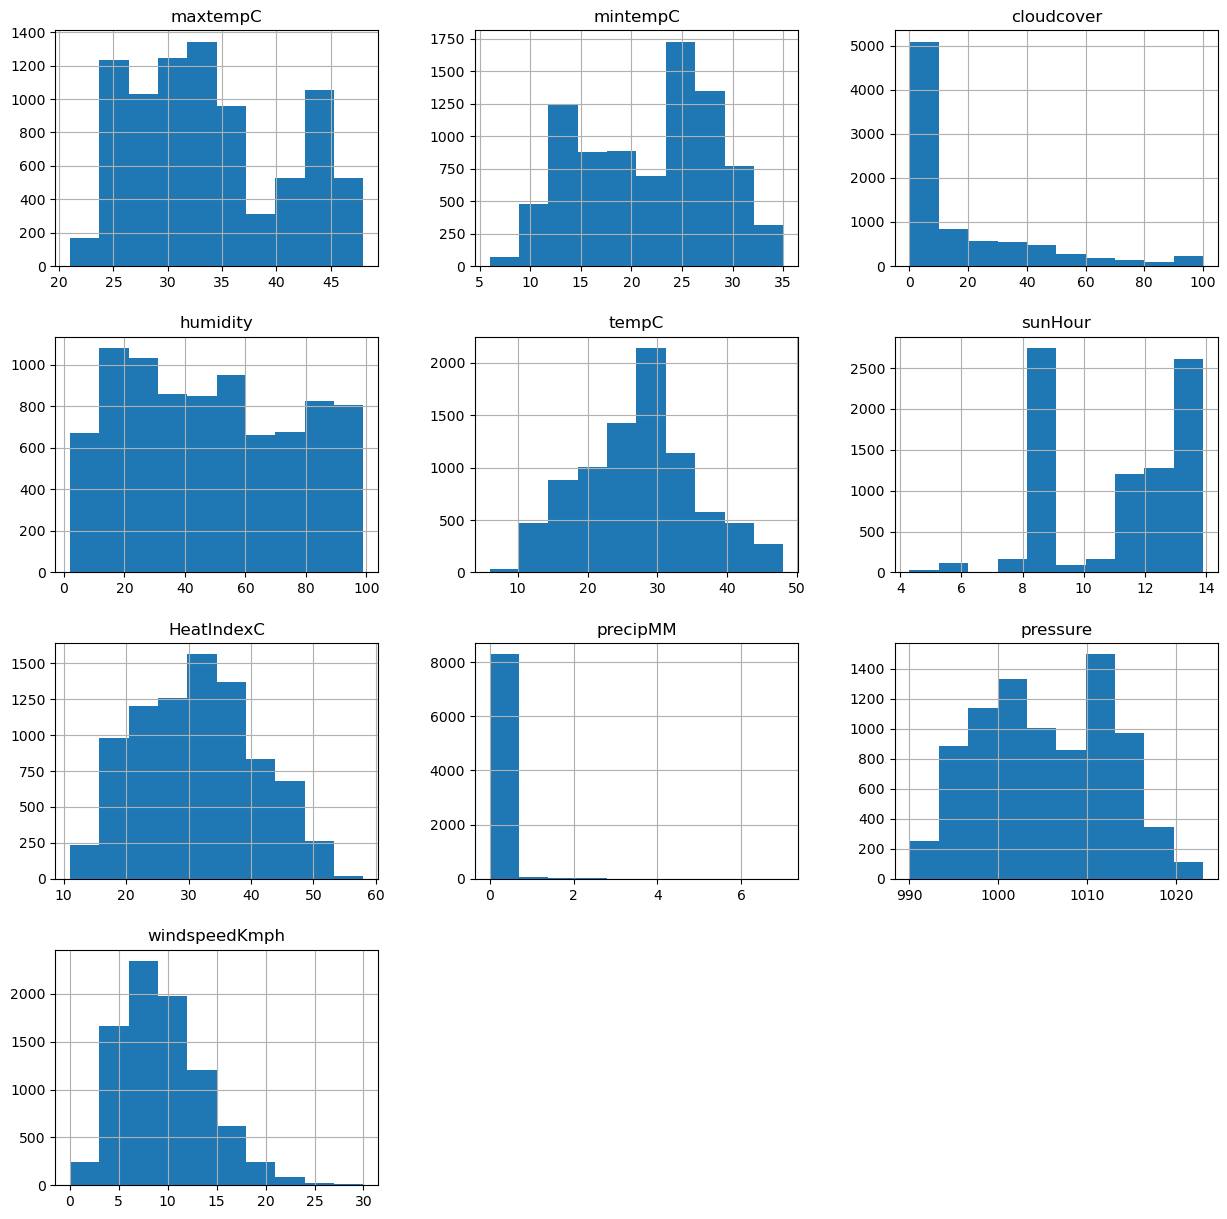

In [13]:
weather_df_num.hist(bins=10,figsize=(15,15))


In [15]:
weth=weather_df_num['2007':'2012']
weth.head()


,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2009-01-01 00:00:00,24,10,17,50,11,8.7,12,0.0,1015,10
2009-01-01 01:00:00,24,10,11,52,11,8.7,13,0.0,1015,11
2009-01-01 02:00:00,24,10,6,55,11,8.7,13,0.0,1015,11
2009-01-01 03:00:00,24,10,0,57,10,8.7,13,0.0,1015,12
2009-01-01 04:00:00,24,10,0,54,11,8.7,14,0.0,1016,11


In [16]:
weather_y=weather_df_num.pop("tempC")
weather_x=weather_df_num


### Now our dataset is prepared and it is ready to be fed to the model for training.it’s time to split the dataset into training and testing.


In [17]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)


In [18]:
train_X.shape


(6728, 9)

In [19]:
train_y.shape


(6728,)

### train_x has all the features except temperature and train_y has the corresponding temperature for those features. in supervised machine learning we first feed the model with input and associated output and then we check with a new input.


In [20]:
train_y.head()


date_time
2009-11-08 02:00:00    19
2009-11-30 02:00:00    11
2009-01-24 08:00:00    21
2009-11-13 07:00:00    24
2009-09-09 08:00:00    27
Name: tempC, dtype: int64

# Multiple Linear Regression


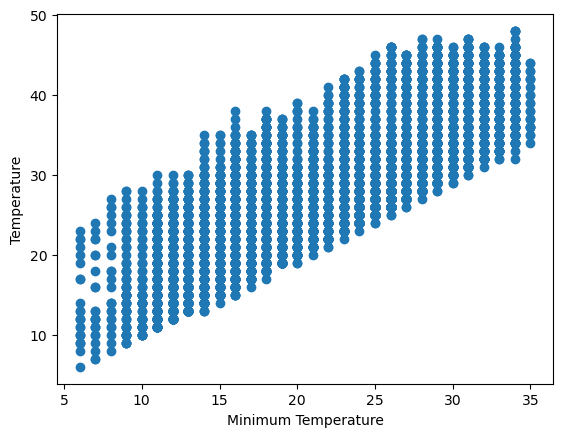

In [21]:
plt.scatter(weth.mintempC, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()


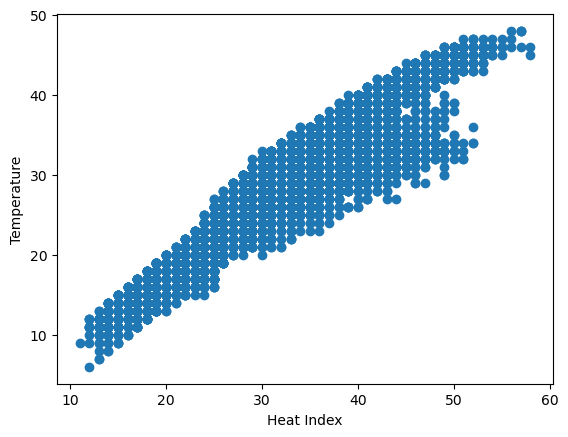

In [22]:
plt.scatter(weth.HeatIndexC, weth.tempC)
plt.xlabel("Heat Index")
plt.ylabel("Temperature")
plt.show()


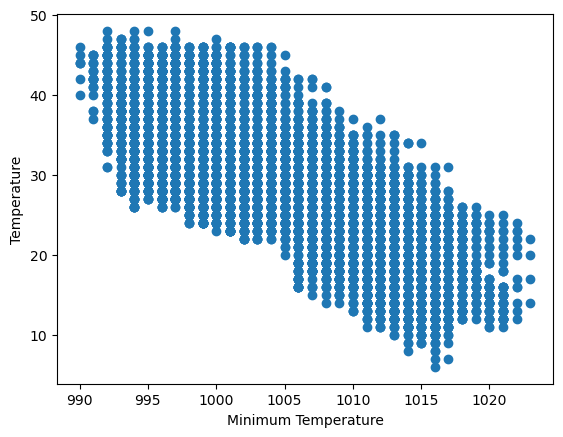

In [23]:
plt.scatter(weth.pressure, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()


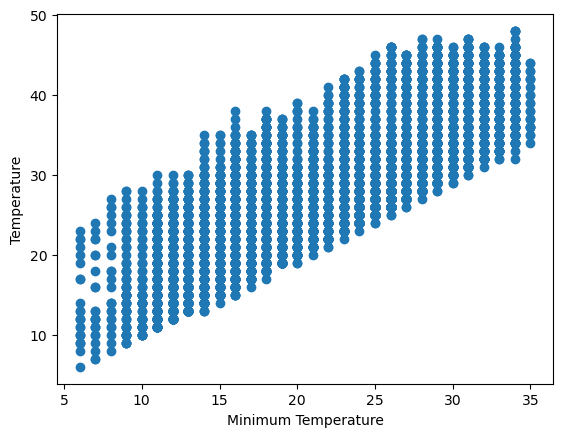

In [24]:
plt.scatter(weth.mintempC, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()


In [25]:
model=LinearRegression()
model.fit(train_X,train_y)


LinearRegression()

In [26]:
prediction = model.predict(test_X)


In [27]:
#calculating error
np.mean(np.absolute(prediction-test_y))


1.2043883821203738

In [28]:
print('Variance score: %.2f' % model.score(test_X, test_y))


Variance score: 0.97


In [29]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})


,Actual,Prediction,diff
date_time,,,
2009-07-14 10:00:00,37,39.53,-2.53
2009-05-09 00:00:00,28,29.66,-1.66
2009-10-27 01:00:00,16,19.75,-3.75
2009-02-02 11:00:00,25,23.95,1.05
2009-12-06 19:00:00,16,15.91,0.09
...,...,...,...
2009-01-28 08:00:00,21,21.50,-0.50
2009-10-29 12:00:00,30,29.08,0.92
2009-07-30 08:00:00,32,33.15,-1.15


# Decision Tree Regression


In [30]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)



DecisionTreeRegressor(random_state=0)

In [31]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))


0.6086999603646452

In [32]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))


Variance score: 0.99


In [33]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})


,Actual,Prediction,diff
date_time,,,
2009-07-14 10:00:00,37,38.0,-1.0
2009-05-09 00:00:00,28,29.0,-1.0
2009-10-27 01:00:00,16,17.0,-1.0
2009-02-02 11:00:00,25,26.0,-1.0
2009-12-06 19:00:00,16,16.0,0.0
...,...,...,...
2009-01-28 08:00:00,21,19.0,2.0
2009-10-29 12:00:00,30,30.0,0.0
2009-07-30 08:00:00,32,32.0,0.0


# Random Forest Regression


In [34]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)



RandomForestRegressor(max_depth=90, random_state=0)

In [35]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))


0.5035201290980125

In [36]:
print('Variance score: %.2f' % regr.score(test_X, test_y))


Variance score: 0.99


In [37]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})


,Actual,Prediction,diff
date_time,,,
2009-07-14 10:00:00,37,36.44,0.56
2009-05-09 00:00:00,28,29.51,-1.51
2009-10-27 01:00:00,16,17.57,-1.57
2009-02-02 11:00:00,25,25.75,-0.75
2009-12-06 19:00:00,16,15.68,0.32
...,...,...,...
2009-01-28 08:00:00,21,19.90,1.10
2009-10-29 12:00:00,30,29.42,0.58
2009-07-30 08:00:00,32,31.94,0.06


In [38]:
from sklearn.metrics import r2_score


# Calculating R2-score for Multiple Linear Regression


In [39]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )


Mean absolute error: 1.20
Residual sum of squares (MSE): 2.22
R2-score: 0.97


# Calculating R2-score for Decision Tree Regression


In [40]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )


Mean absolute error: 0.61
Residual sum of squares (MSE): 0.85
R2-score: 0.99


# Calculating R2-score for Random Forest Regression


In [41]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )


Mean absolute error: 0.50
Residual sum of squares (MSE): 0.44
R2-score: 0.99
